<a href="https://colab.research.google.com/github/shubhamkumar6524/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>


## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


## <b> Data Description </b>

### <b>Attribute Information: </b>

*   **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera mega pixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory in Gigabytes
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores of processor
* **Pc** - Primary Camera mega pixels
* **Px_height** - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in Mega Bytes
* **Sc_h** - Screen Height of mobile in cm
* **Sc_w** - Screen Width of mobile in cm
* **Talk_time** - longest time that a single battery charge will last
* **Three_g** - Has 3G or not
* **Touch_screen** - Has touch screen or not
* **Wifi** - Has wifi or not
* **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
* 2(high cost) and 3(very high cost).

In [1]:
((4**2)+(0.5**2))**0.5

4.031128874149275

In [2]:
# Taking help of the Following Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings("ignore")


In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Creating a path in drive
path = '/content/drive/MyDrive/AlmaBetter/'

In [5]:
#reading the dataset 
df = pd.read_csv(path + 'data_mobile_price_range.csv', encoding='latin-1')

# **2. Deeper Understanding of the Data**
As there is a huge no. of experiences, we take the help of statistics to measure each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

In [6]:
#checking the first five observations
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
#checking the last five observations
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
#to get the Rows and Columns in the dataset
print(f"No. of rows in dataset : {df.shape[0]}")
print(f"No. of columns in dataset : {df.shape[1]}")

No. of rows in dataset : 2000
No. of columns in dataset : 21


In [9]:
#information about the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
#description about the dataset
df.describe(include = 'all')


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [12]:
df[df['sc_w']==0].shape[0]

180

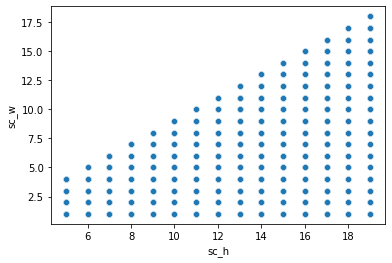

In [13]:
sns.scatterplot(df[df['sc_w']!=0]['sc_h'], df[df['sc_w']!=0]['sc_w'])
plt.show()

In [14]:
srs = df[df['sc_w']!=0].groupby(by='sc_h')['sc_w'].mean()
srs

sc_h
5     2.426667
6     2.768421
7     3.603053
8     4.247619
9     4.043860
10    4.592593
11    5.871795
12    6.608392
13    6.636364
14    7.154412
15    7.348837
16    8.128788
17    8.807692
18    8.938053
19    9.848739
Name: sc_w, dtype: float64

In [15]:
import math
d = {key:math.ceil(value) for key,value in zip(srs.index, srs.values)}

In [16]:
sc_h = list(df['sc_h'])
sc_w = list(df['sc_w'])

for i in range(len(sc_w)):
    if sc_w[i] == 0:
        sc_w[i] = d[sc_h[i]]

df['sc_h'] = sc_h
df['sc_w'] = sc_w

In [17]:
df[df['sc_w']==0].shape[0]

0

In [18]:
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5

df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [19]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'screen_size'],
      dtype='object')

In [20]:
#checking the columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'screen_size'],
      dtype='object')

There are no null values in the data set.

# **3. Data Cleaning**
**3.1  Check missing values, column type and column names**

In [21]:
#Checking missing values in each column
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
screen_size      0
dtype: int64

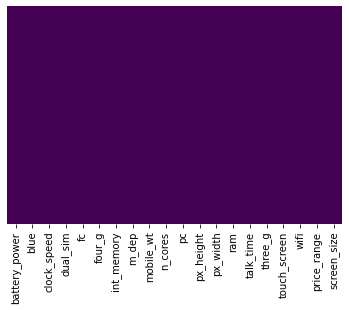

In [22]:
#Heatmap for Null values check in cleaned database 
sns.heatmap(df.isnull() , yticklabels=False , cbar=False,  cmap='viridis')

There is no missing value, all columns have the correct type, and most columns are named consistently. 

# **3.2 Check duplicate records**

In [23]:
# Cheking for duplicate data.
df.duplicated().sum()

0

There are no duplicate rows in the data set.

In [24]:
# Understand the data by checking the first row
df.loc[0]

battery_power     842.000000
blue                0.000000
clock_speed         2.200000
dual_sim            0.000000
fc                  1.000000
four_g              0.000000
int_memory          7.000000
m_dep               0.600000
mobile_wt         188.000000
n_cores             2.000000
pc                  2.000000
px_height          20.000000
px_width          756.000000
ram              2549.000000
talk_time          19.000000
three_g             0.000000
touch_screen        0.000000
wifi                1.000000
price_range         1.000000
screen_size        11.401754
Name: 0, dtype: float64

# **4. Exploratory Data Analysis and Data Visualization**

#####When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

#### We tried answering the following few questions while performing univariate, bivariate and multivariate analysis to discover some insights from the data like:

  * Distribution of the target variable to check whether the classes are balanced or imbalanced.

  * Countplots for each categorical feature to check the distribution of the categorical variables.

  * Distribution of the numerical features.

  * How categorical and numerical features vary with different price ranges?

  * How different combinations of number of cores, battery power and RAM vary with different price ranges?

In [25]:
## defining the categorical and numerical features separately
dep_variable = 'price_range'
cat_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
num_features = list(set(df.columns) -  set(cat_features) - {dep_variable})

## **Checking the distribution of the target variable**

In [26]:
# Checking the dependent vairable distribution
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

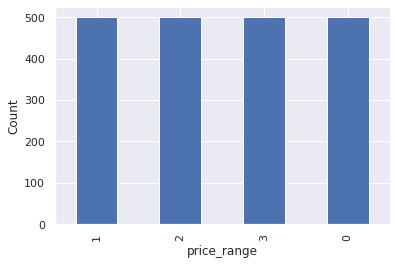

In [27]:
# Plotting the dependent vairable distribution
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

Provided dataset is balanced.

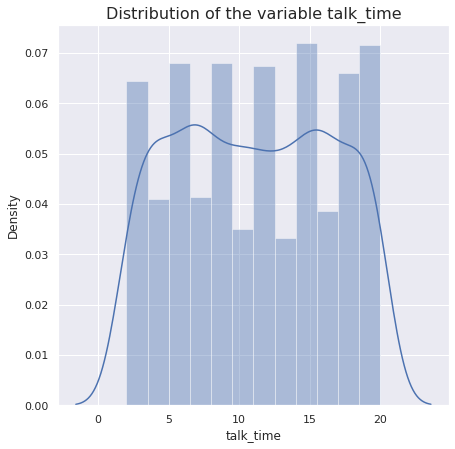

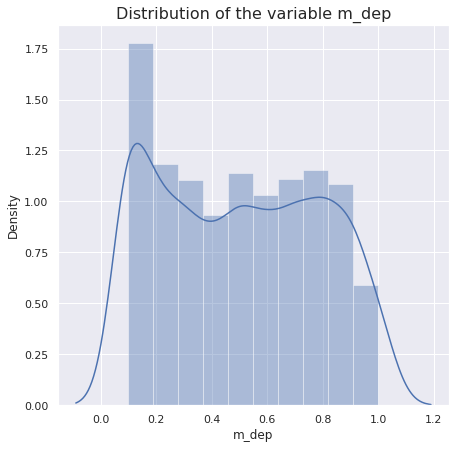

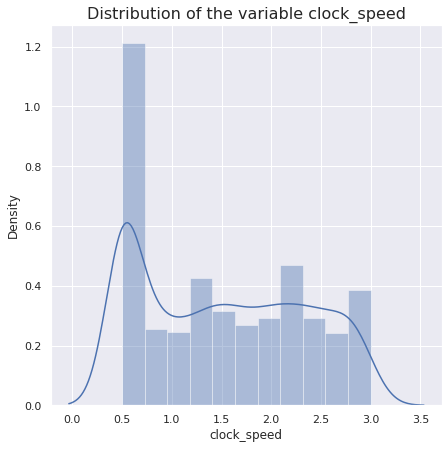

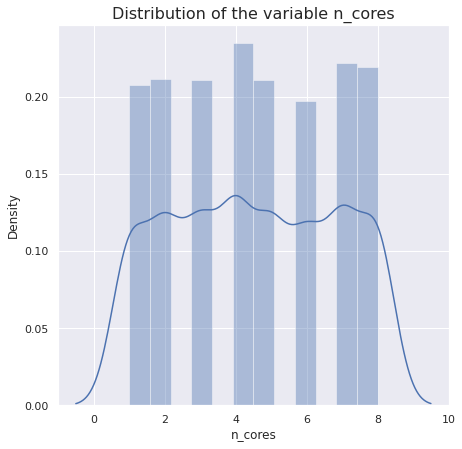

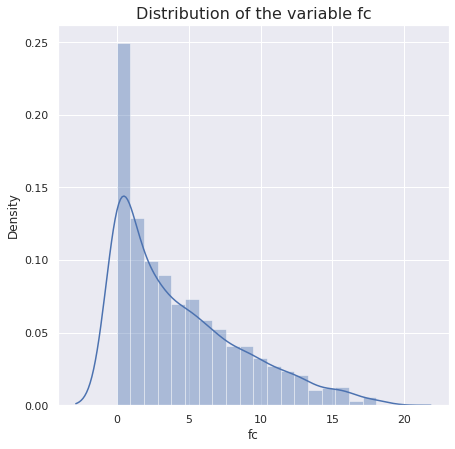

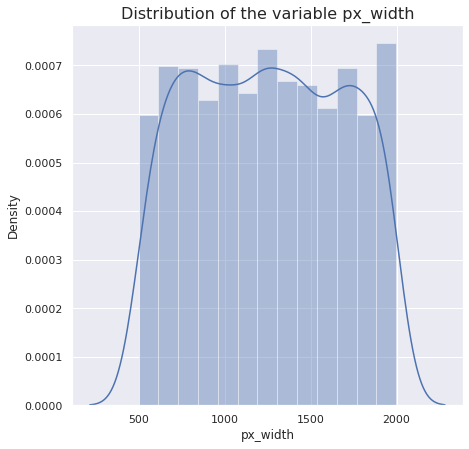

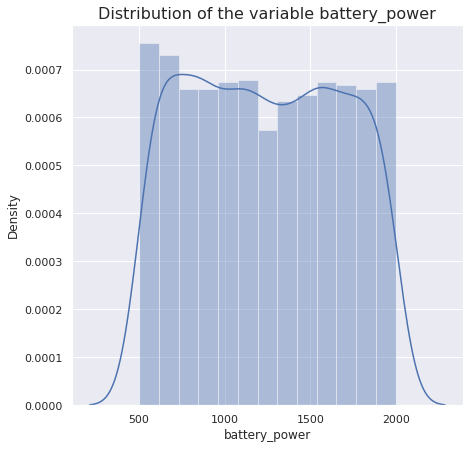

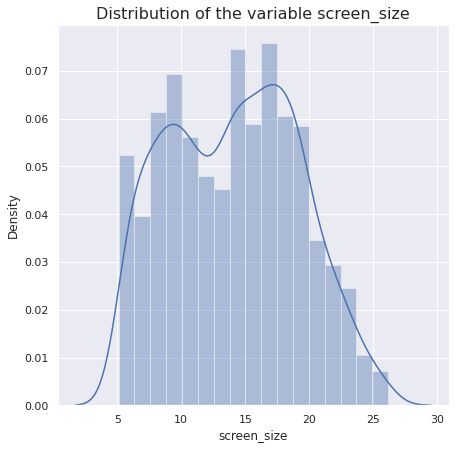

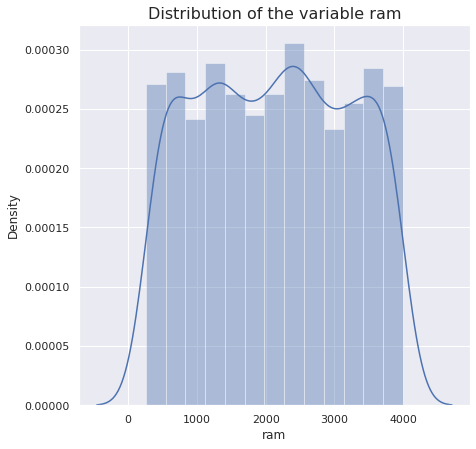

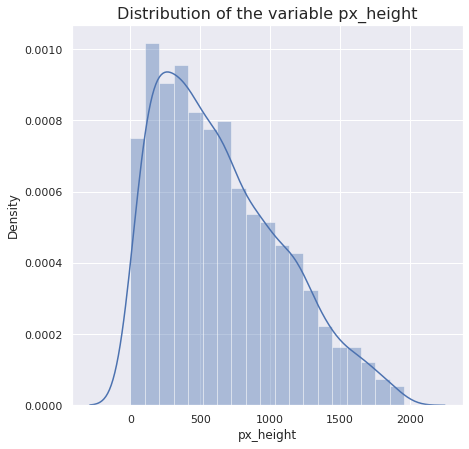

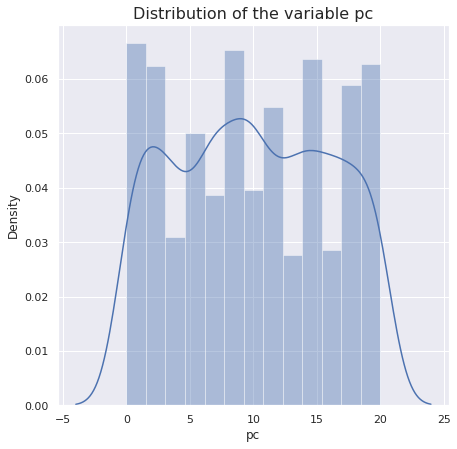

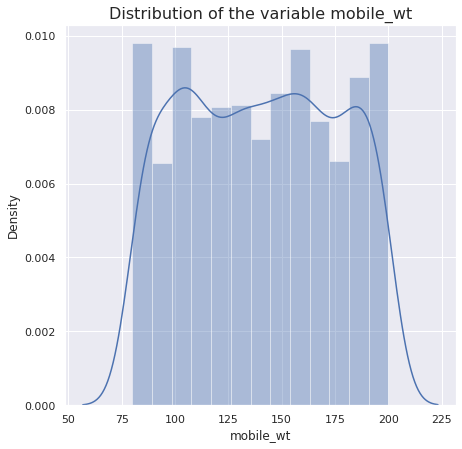

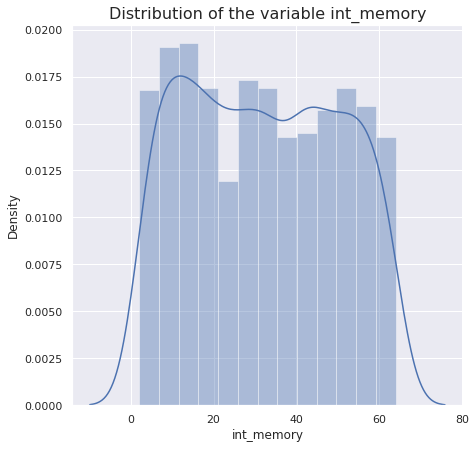

In [28]:
# Plotting the distribution of the numerical features
sns.set(rc={'figure.figsize':(7,7)})
sns.set_color_codes("pastel")
for col in num_features:
  sns.distplot(df[col])
  plt.title(f"Distribution of the variable {col}", fontsize=16)
  plt.xlabel(f"{col}")
  plt.ylabel("Density")
  plt.show()

### **Checking the distribution of the categorical features:**

In [29]:
# Value counts for each categorical feature
print('Bluetooth\n', df['blue'].value_counts())
print('Dual Sim\n', df['dual_sim'].value_counts())
print('4G\n', df['four_g'].value_counts())
print('3G\n', df['three_g'].value_counts())
print('Touch Screen\n', df['touch_screen'].value_counts())
print('Wifi\n', df['wifi'].value_counts())

Bluetooth
 0    1010
1     990
Name: blue, dtype: int64
Dual Sim
 1    1019
0     981
Name: dual_sim, dtype: int64
4G
 1    1043
0     957
Name: four_g, dtype: int64
3G
 1    1523
0     477
Name: three_g, dtype: int64
Touch Screen
 1    1006
0     994
Name: touch_screen, dtype: int64
Wifi
 1    1014
0     986
Name: wifi, dtype: int64


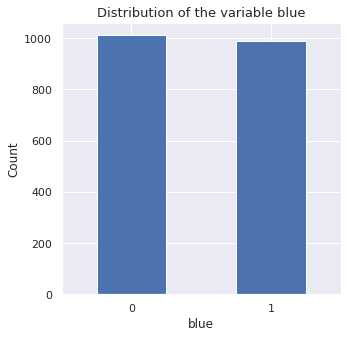

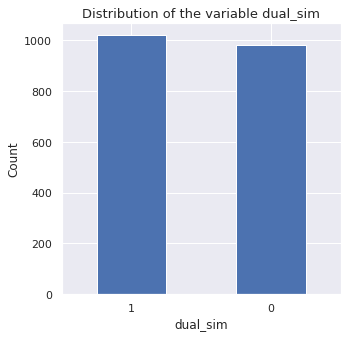

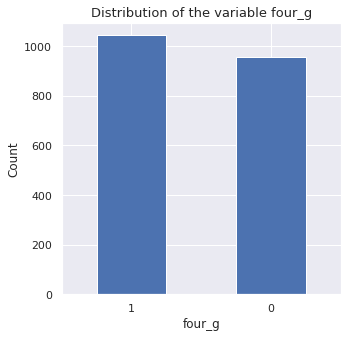

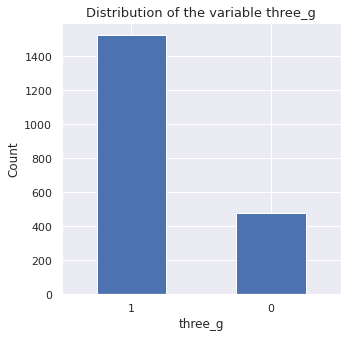

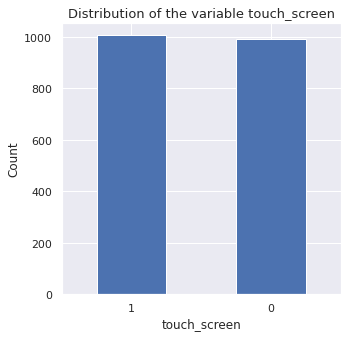

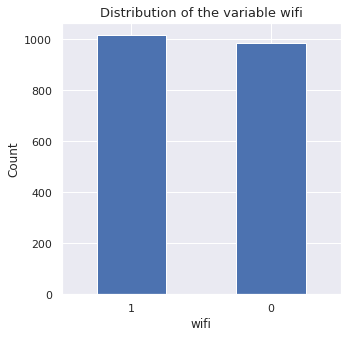

In [30]:
 # Plotting the distribution of the categorical features
chart = sns.set(rc={'figure.figsize':(5,5)})
for col in cat_features:
  df[col].value_counts().plot(kind = 'bar')
  plt.title(f"Distribution of the variable {col}", fontsize=13)
  plt.xlabel(f"{col}")
  plt.xticks(rotation=0)
  plt.ylabel("Count")
  plt.show()
  

# Identifying Outliers in the dataset


Data distribution


In [31]:
# Define the categorical and numerical features separately
dep_variable = 'price_range'
cat_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
num_features = list(set(df.columns) -  set(cat_features) - {dep_variable})


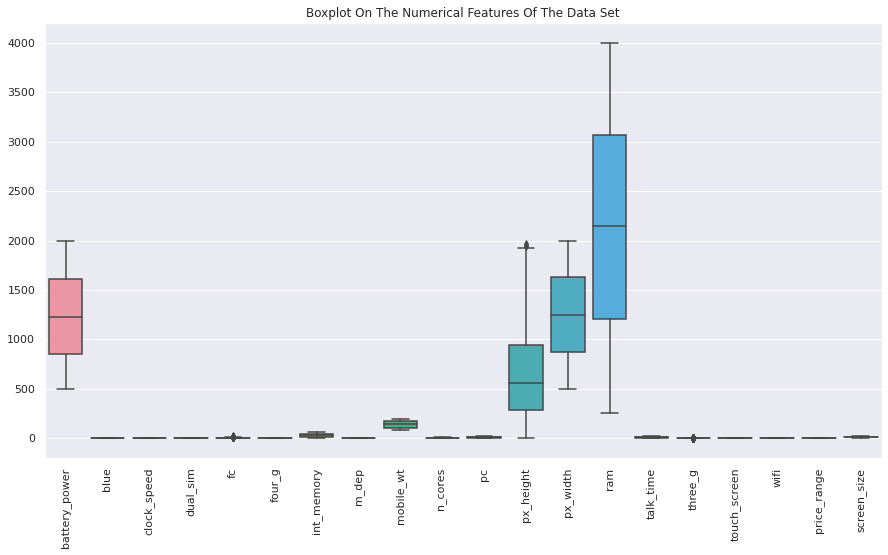

In [32]:
# Boxplot on numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data = df)
plt.xticks(rotation = "vertical")
plt.title("Boxplot On The Numerical Features Of The Data Set")
plt.show()

### **Checking the outliers for the numerical features:**

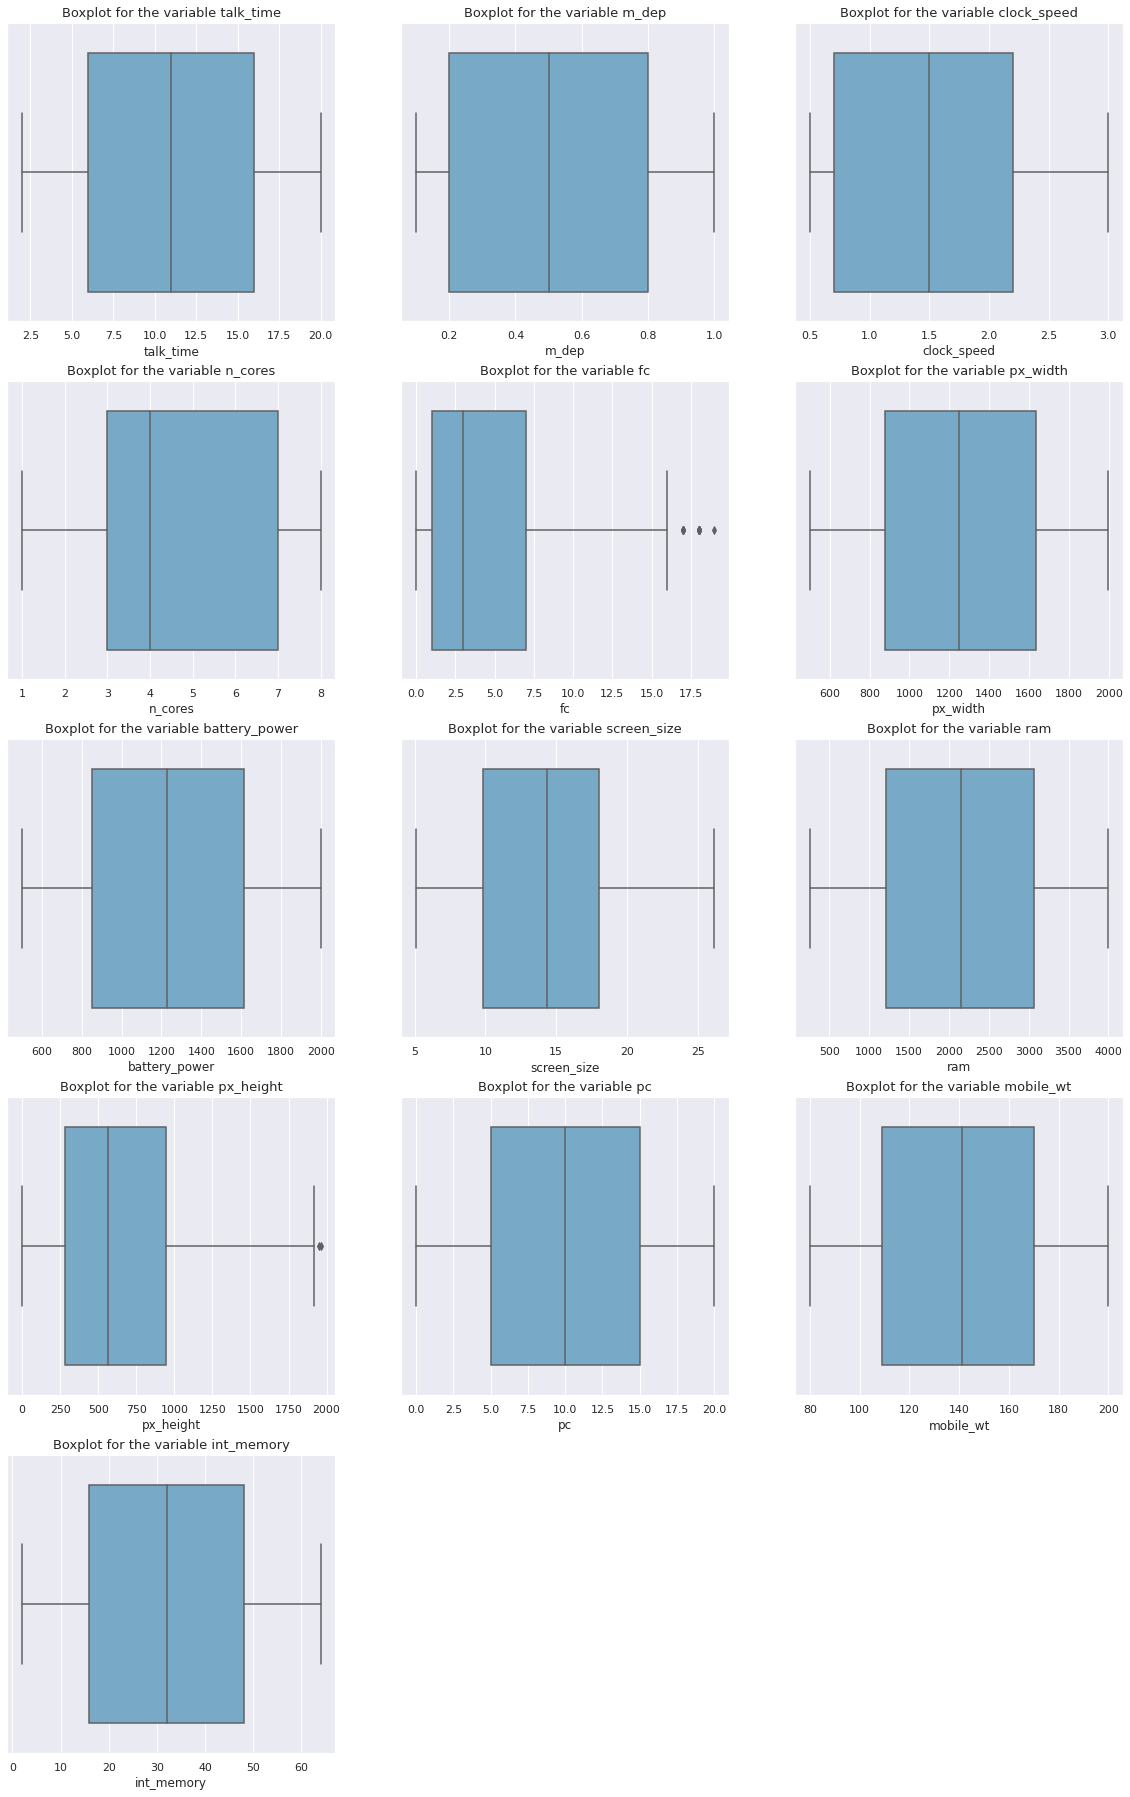

In [33]:
# plot the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for col in num_features:
  plt.subplot(7,3,count)
  sns.boxplot(df[col], palette='Blues')
  plt.title(f"Boxplot for the variable {col}", fontsize=13)
  plt.xlabel(f"{col}")
  count += 1

* The boxplots demonstrate that there are outliers in fc and px height, but these values cannot be regarded as outliers because they are relatively typical for the various types of mobile phones on the market.

* Since we are aware of phones with front cameras with a resolution of 20 MP or above, values as low as 17.5 MP are theoretically possible.

* We've even seen large-sized mobile phones with 4K, pure HD, and other screen resolutions that are available.

### **Checking how each categorical feature vary with different price ranges**

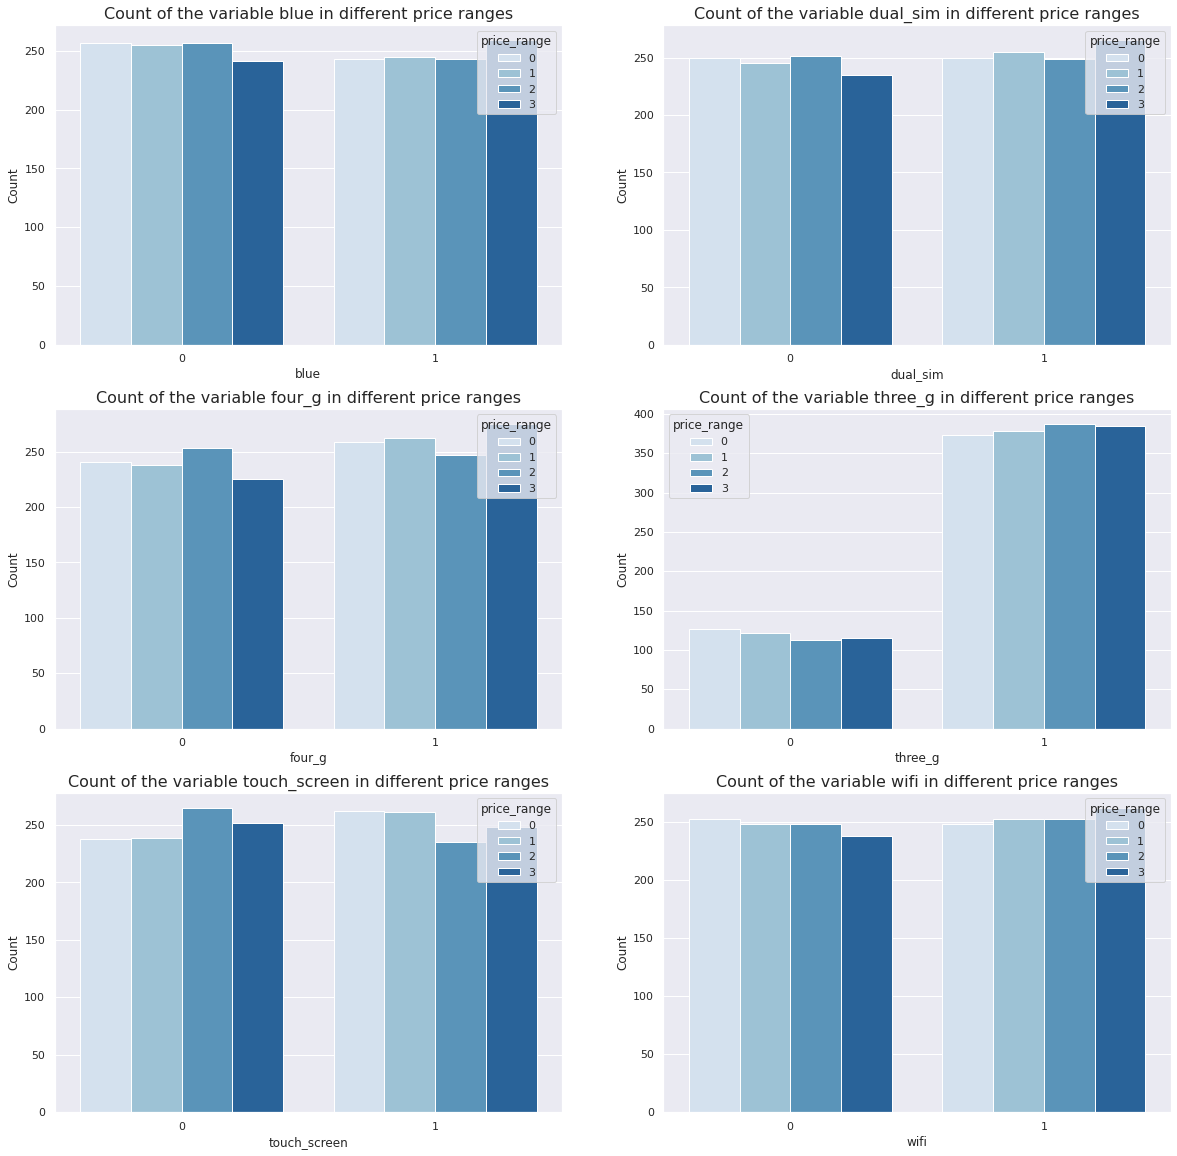

In [34]:
# Plotting the count of categorical features for different price range
count = 1
plt.subplots(figsize=(20,20))
for col in cat_features:
  plt.subplot(3,2,count)
  sns.countplot(df[col], hue=df['price_range'], palette='Blues')
  
  plt.title(f"Count of the variable {col} in different price ranges", fontsize=16)
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  count += 1

### **Checking how each numerical feature vary with different price ranges:**

In [35]:
num_features

['talk_time',
 'm_dep',
 'clock_speed',
 'n_cores',
 'fc',
 'px_width',
 'battery_power',
 'screen_size',
 'ram',
 'px_height',
 'pc',
 'mobile_wt',
 'int_memory']

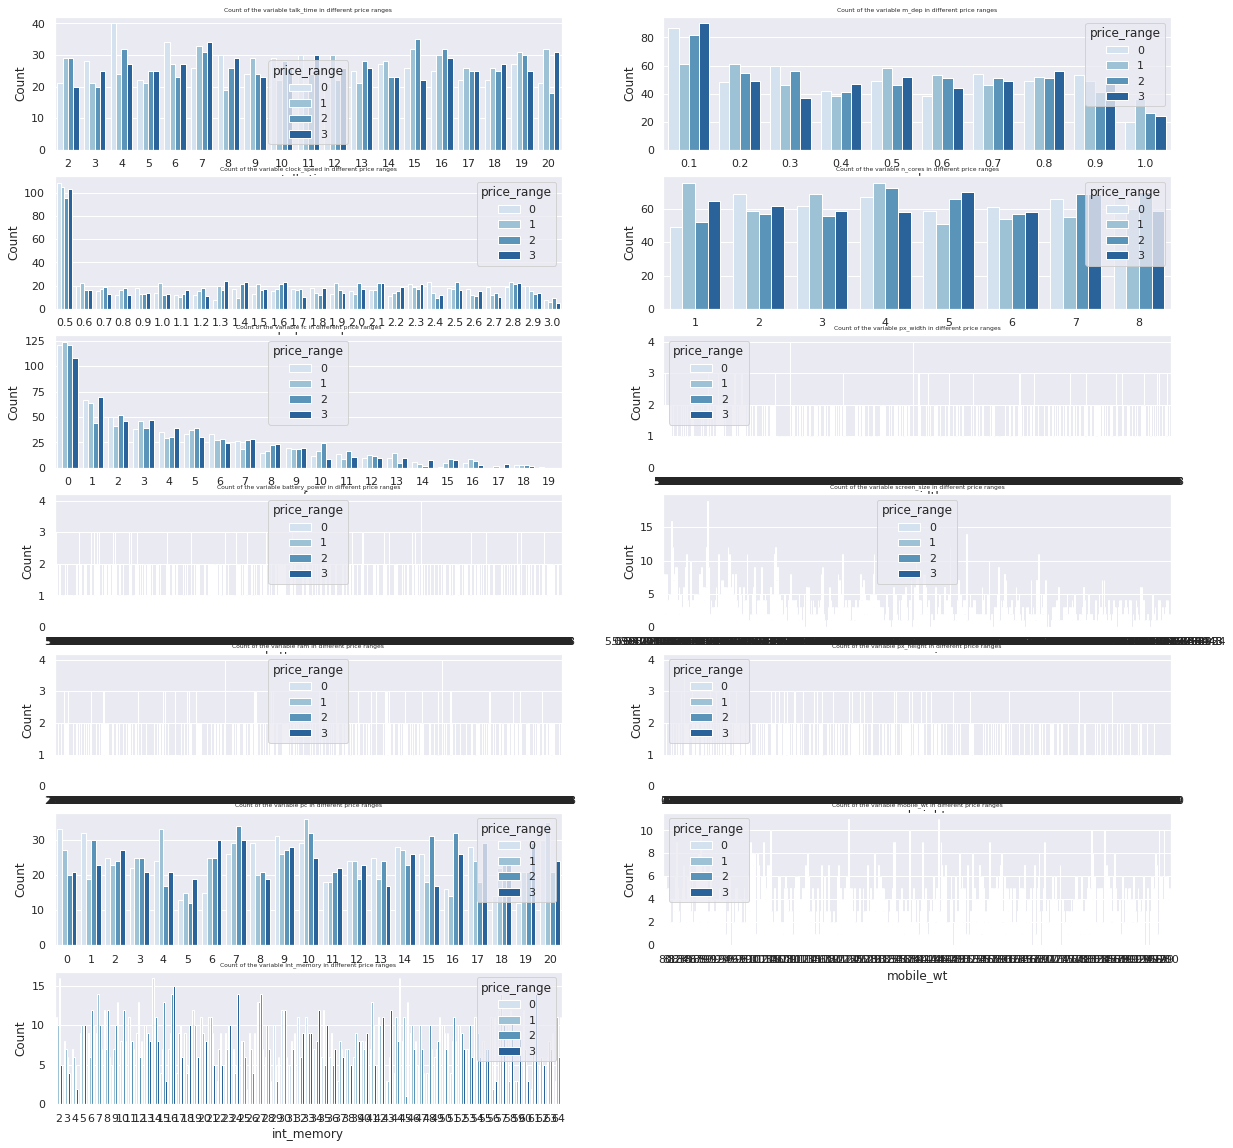

In [36]:
count = 1
plt.subplots(figsize=(20,20))
for col in num_features:
  plt.subplot(7,2,count)
  sns.countplot(df[col], hue=df['price_range'], palette='Blues')
  
  plt.title(f"Count of the variable {col} in different price ranges", fontsize=6)
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  count += 1

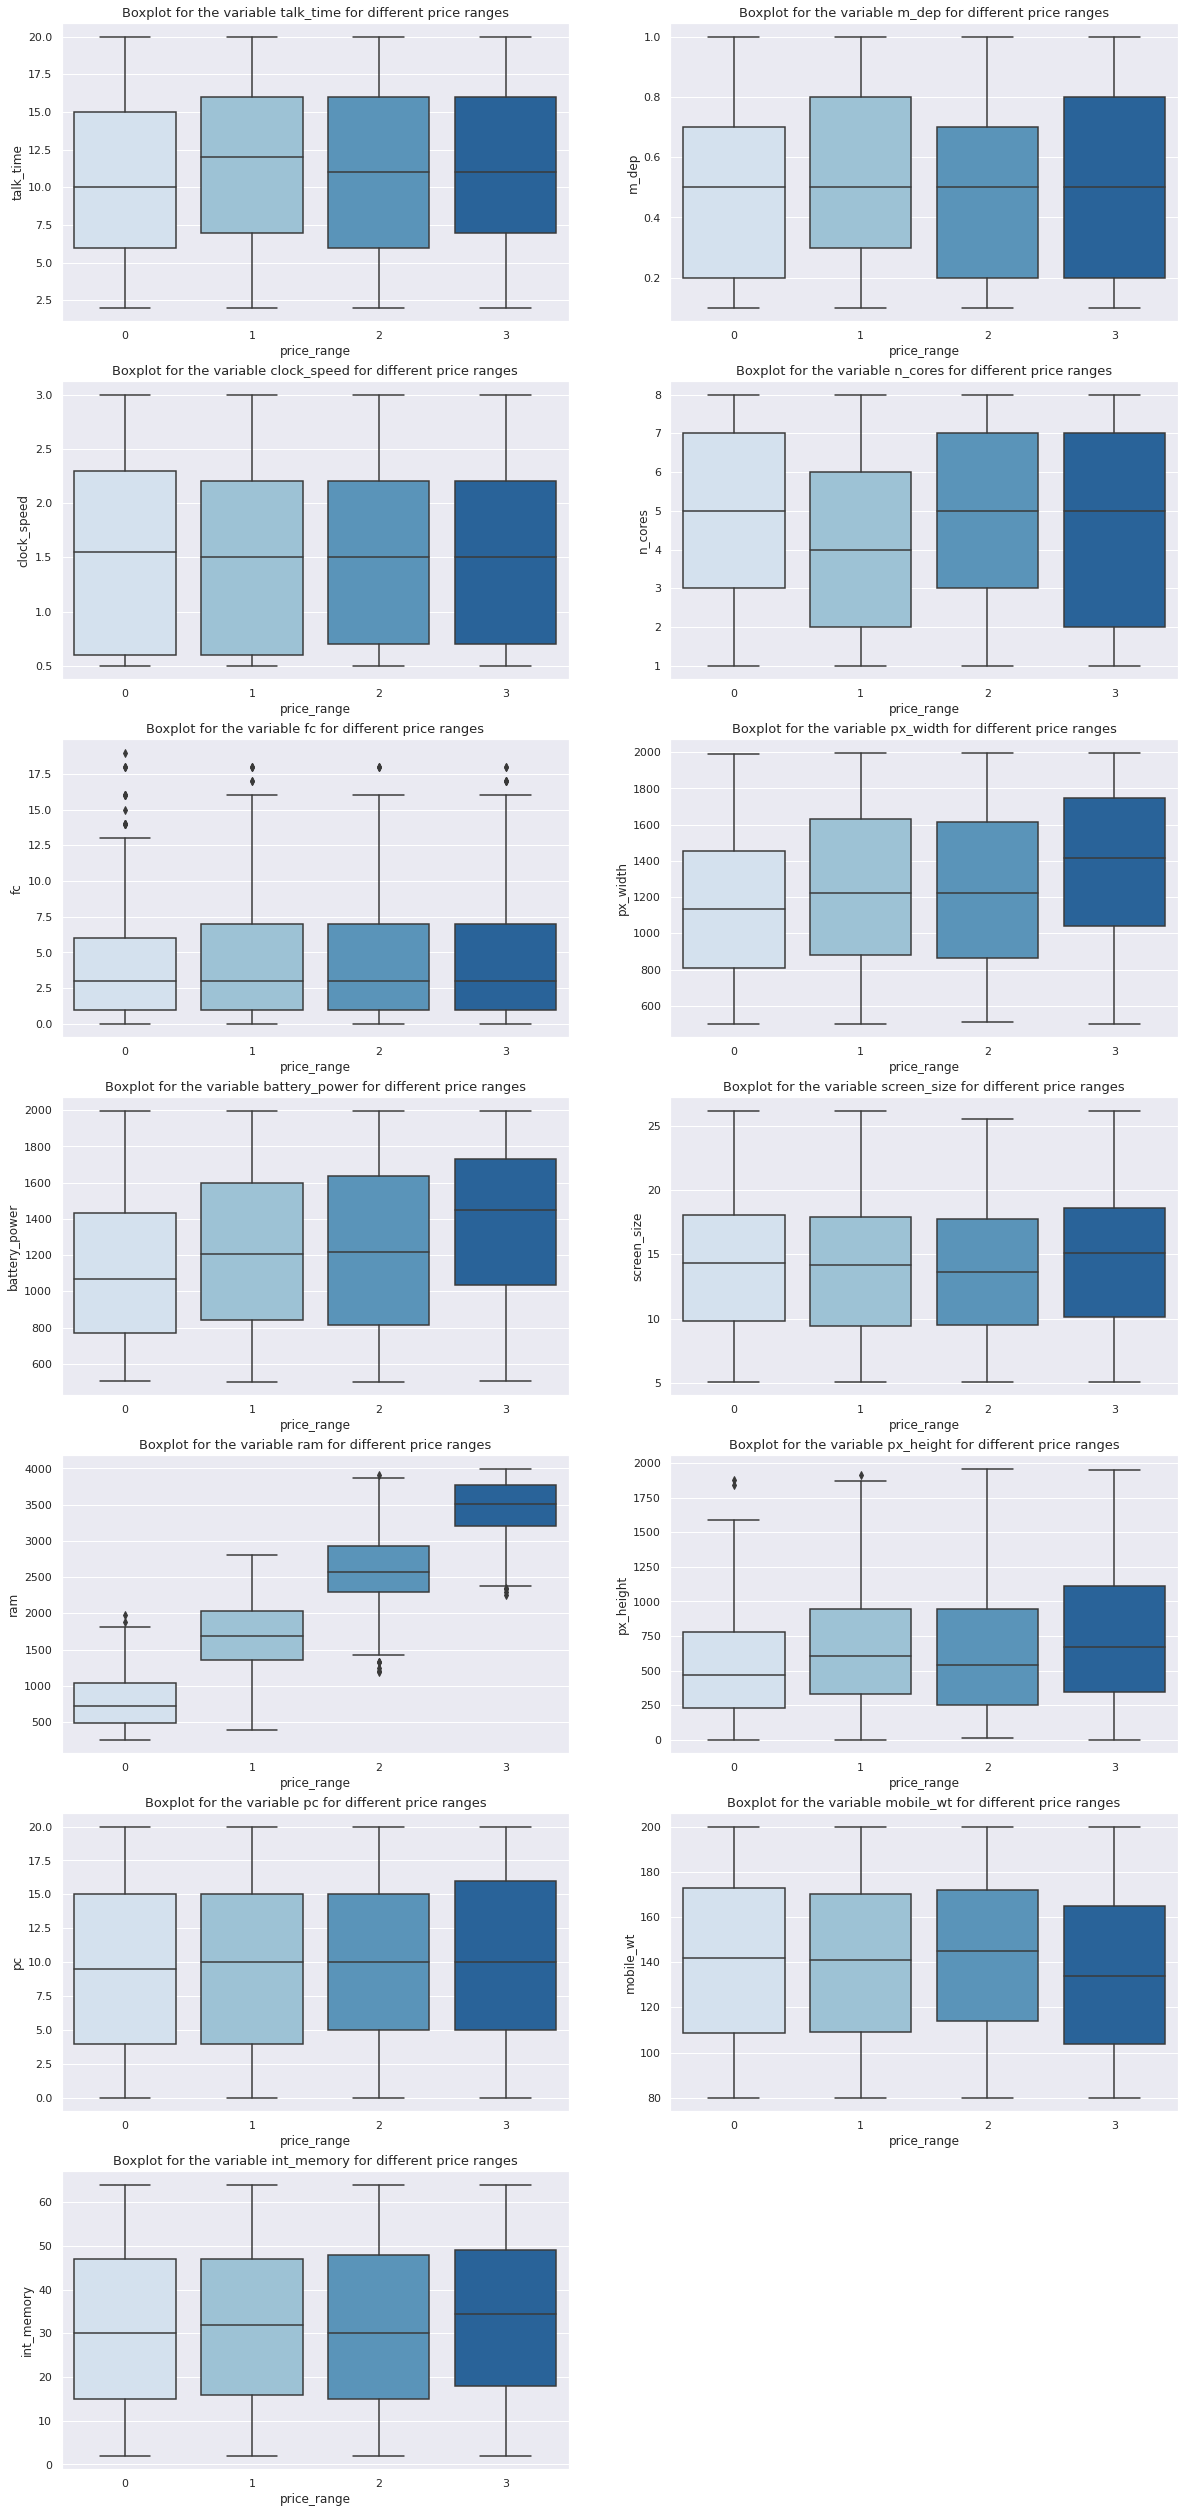

In [37]:
# Plotting the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for col in num_features:
  plt.subplot(7,2,count)
  sns.boxplot(y=df[col], x=df['price_range'], palette='Blues')
  plt.title(f"Boxplot for the variable {col} for different price ranges", fontsize=13)
  plt.xlabel("price_range")
  count += 1

###From the above charts, we can conclude that:
 * battery power is linearly related to price if the price goes up the battery power increases. 
 * Clock speed is not linearly dependent as it does not increase with the price range. In the low-cost category, there are more options for improving clock speed. 
 * Front camera remains the same for all price points. The price range does not depend much on the front camera. 
 * Internal memory remains the same for all price points, with minor changes. 
 * More depth and more mobile phones are available in the mid-price range and very high-priced categories compared to other price categories. 
 * You can get more phones with lighter weight at a very high price range. 
 * The median values of n_cores are higher in the low-cost and high-cost category, but there are more opportunities to choose n_cores in the very high-cost categories. 
 * Primary camera remains the same for all price points. 
 * In the very high-cost category, the pixel height and width will increase slightly. This means that you will get more pixel resolution in the very high-cost categories. 
 * The price increases with RAM, so it depends linearly on RAM. There is a big difference in 
 RAM between each price range. RAM is an influential factor in predicting the mobile price range. 
 * Median talk time and screen size (ie sc_h and sc_w) are about the same for all price points. Therefore, the price is largely independent of these two features. 
 * Each function that increases or decreases according to the price greatly contributes to the prediction of mobile price.

### **Finding out how number of cores and battery power vary with price range:**

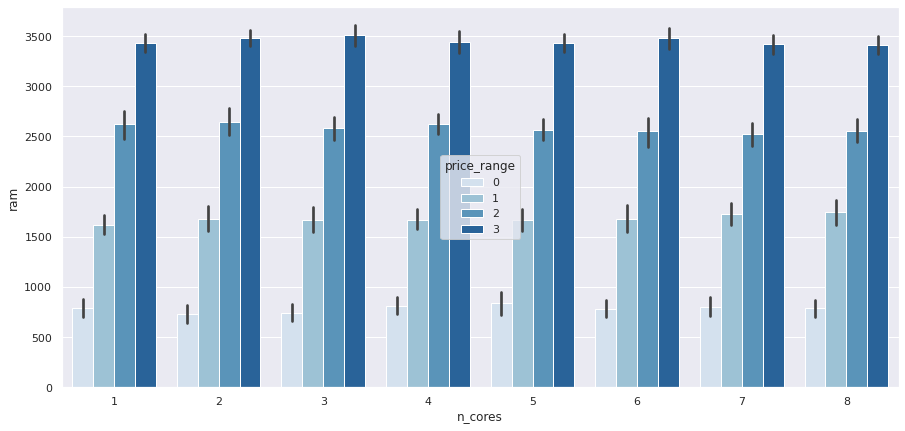

In [38]:
# Plotting n_cores and ram with price ranges
plt.figure(figsize=(15,7))
sns.barplot(x='n_cores', y='ram', hue='price_range', data=df, palette = 'Blues')
plt.show()

### From the above graph, we can conclude that:

* For each core, we get the most battery strength in the very high-cost class of cell phones. 
 
* We have the choice to pick the no. of cores in any class.
 
* On an average 1, 4 and 6 has the most battery power available across all price ranges.
 

### **Finding out how number of cores and RAM vary with different price ranges:**

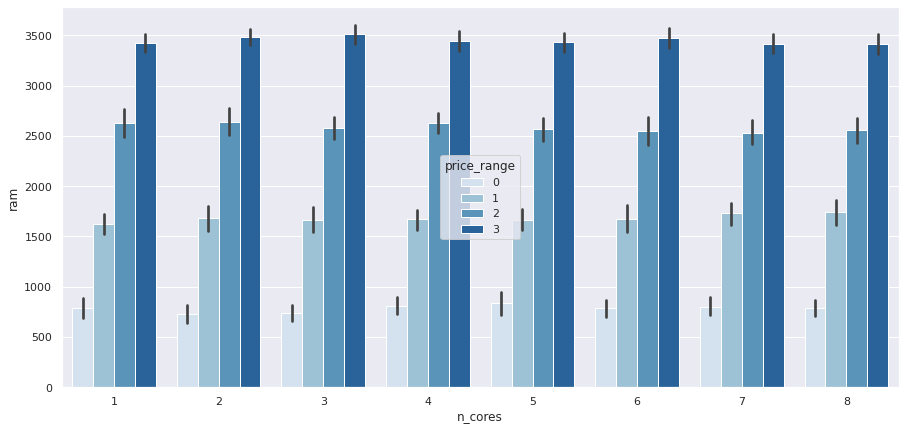

In [39]:
# plot n_cores and ram with price ranges
plt.figure(figsize=(15,7))
sns.barplot(x='n_cores', y='ram', hue='price_range', data=df, palette = 'Blues')
plt.show()

### From the above graph, we can conclude that:

* We get maximum ram availability in high-cost category. Thus, it is a strong predictor of the price range as we can see RAM increases with price for each number of cores available.


# **4 Correlation Matrix - HEATMAP**

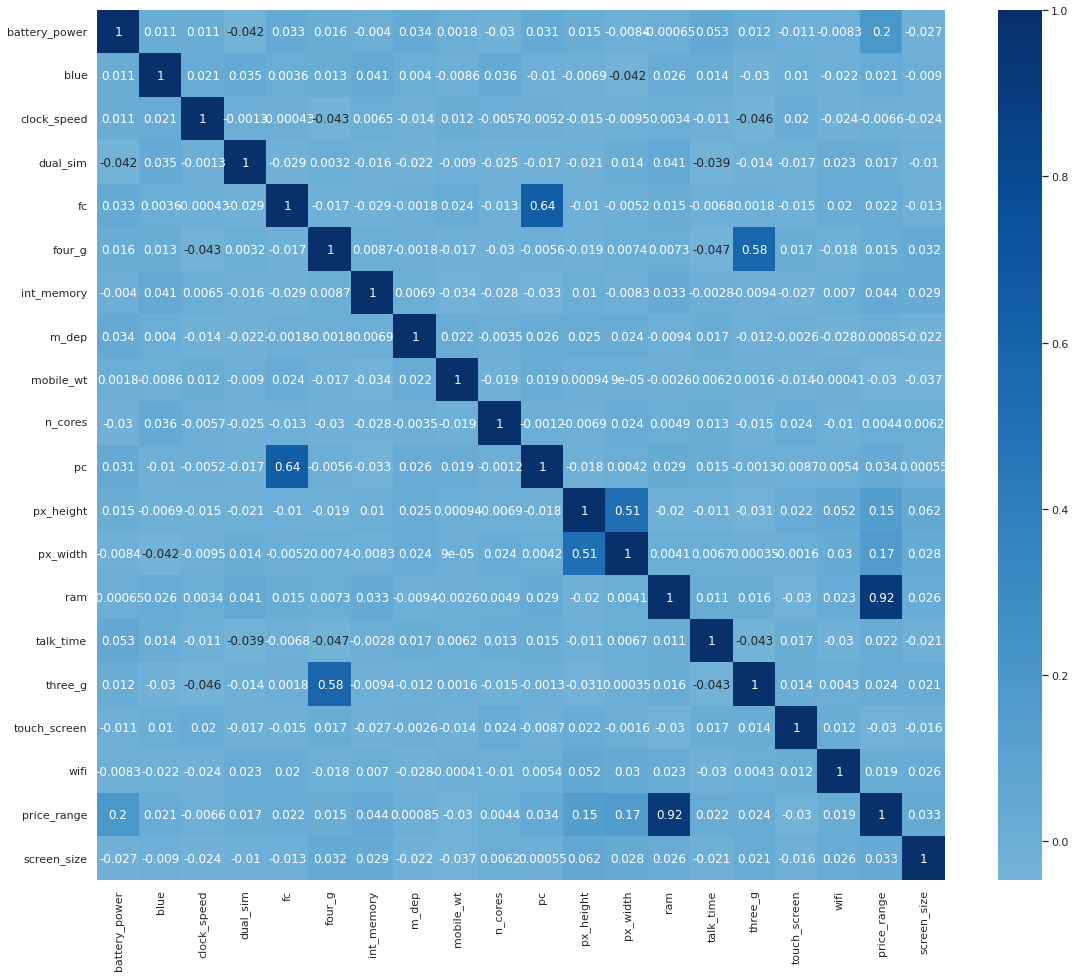

In [40]:
#Correlation Matrix - HEATMAP
plt.figure(figsize=(19,16))
sns.heatmap(df.corr(),annot=True,center = 0 , cmap ='Blues')
plt.show()

### From the correlation plot above we can observe that:

* RAM is the only feature that strongly correlates with the target variable. Hence, RAM is a powerful predictor of price range variables. 
 
 * fc and pc correlate with a value of 0.65. This is apparent when the number of primary cameras increases and so does the front camera. When purchasing a mobile phone, you cannot combine these features because both have different parameters. 
 
 * three_g and four_g correlate with a value of 0.59. This is also clear, as  mobile phones that support 4G also support 3G, but not the other way around. 
 
 * Most  independent variables are not strongly correlated with each other, so there is no need to remove the feature.

### **Checking how the numerical features are correlated with the target variable:**

In [41]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'screen_size'],
      dtype='object')

In [42]:
num_features

['talk_time',
 'm_dep',
 'clock_speed',
 'n_cores',
 'fc',
 'px_width',
 'battery_power',
 'screen_size',
 'ram',
 'px_height',
 'pc',
 'mobile_wt',
 'int_memory']

In [43]:
X= df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g','touch_screen', 'wifi', 'screen_size']]
Y = df['price_range']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,stratify=  Y, train_size = 0.8, random_state=2)

In [46]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [47]:
y_pred= LR.predict(X_test)

In [48]:
train_class_preds = LR.predict(X_train)

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [50]:
print("Accuracy on train data: " ,accuracy_score(train_class_preds,Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
# print("Precision:",precision_score(Y_test, y_pred))
# print("Recall:",recall_score(Y_test, y_pred))

print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.67
Precision Score :  0.67
Recall Score :  0.67


In [51]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import scikitplot as skplt

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV

In [55]:
lr_model = GridSearchCV(LR,
                param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2'],
'C' : [1.0, 0.1, 0.01]}, cv = 3 , verbose = 1)

In [56]:
lr_model.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [57]:
lr_model.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [58]:
lr_model = lr_model.best_estimator_


In [59]:
y_pred = lr_model.predict(X_test)

In [60]:
print("Accuracy on train data: " ,accuracy_score(train_class_preds,Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.9675
Precision Score :  0.9675
Recall Score :  0.9675


In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC(gamma="scale", probability=True)

In [63]:
svc.fit(X_train, Y_train)

SVC(probability=True)

In [64]:
y_pred = svc.predict(X_test)

In [65]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.9425
Precision Score :  0.9425
Recall Score :  0.9425


In [66]:
svc_model = GridSearchCV(SVC(probability=True), param_grid= {'kernel':['poly', 'rbf'],'C':[1.0, 0.1, 0.01],'gamma':[ 'auto']}, cv= 2, verbose= 1)

In [67]:
svc_model.fit(X_train, Y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=SVC(probability=True),
             param_grid={'C': [1.0, 0.1, 0.01], 'gamma': ['auto'],
                         'kernel': ['poly', 'rbf']},
             verbose=1)

In [68]:
svc_model.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'poly'}

In [69]:
svc_model = svc_model.best_estimator_

In [70]:
y_pred = svc_model.predict(X_test)

In [71]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.9525
Precision Score :  0.9525
Recall Score :  0.9525


In [72]:
from sklearn.ensemble import BaggingClassifier

In [73]:
bc = BaggingClassifier()

In [74]:
bc.fit(X_train, Y_train)

BaggingClassifier()

In [75]:
y_pred = bc.predict(X_test)

In [76]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.8575
Precision Score :  0.8575
Recall Score :  0.8575


In [77]:
bc_model = GridSearchCV(bc, param_grid= {'n_estimators':[45,50, 65]}, verbose = 1 , cv = 3)

In [78]:
bc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [45, 50, 65]}, verbose=1)

In [79]:
bc_model.best_params_

{'n_estimators': 50}

In [80]:
bc_model = bc_model.best_estimator_

In [81]:
bc_model.fit(X_train, Y_train)

BaggingClassifier(n_estimators=50)

In [82]:
y_pred = bc_model.predict(X_test)

In [83]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.8675
Precision Score :  0.8675
Recall Score :  0.8675


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier()

In [86]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [87]:
y_pred = rfc.predict(X_test)

In [88]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.8625
Precision Score :  0.8625
Recall Score :  0.8625


In [89]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [90]:
rfc_model = GridSearchCV(rfc, param_grid = dict(n_estimators = [10, 100, 1000]), cv = 3, verbose= 1)

In [91]:
rfc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 100, 1000]}, verbose=1)

In [92]:
rfc_model.best_params_

{'n_estimators': 1000}

In [93]:
rfc_model = rfc_model.best_estimator_

In [94]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [95]:
y_pred = rfc_model.predict(X_test)

In [96]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.86
Precision Score :  0.86
Recall Score :  0.86


In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gbc = GradientBoostingClassifier()

In [99]:
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [100]:
y_pred = gbc.predict(X_test)

In [101]:
print("Accuracy on train data: ",accuracy_score(train_class_preds,Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.8825
Precision Score :  0.8825
Recall Score :  0.8825


In [102]:
gbc_model = GridSearchCV(gbc, param_grid = dict(n_estimators = [10, 50],
learning_rate = [0.001, 0.01, 0.1],
subsample = [0.5, 0.7, 1.0],
max_depth = [3, 7, 9]) , cv= 3, verbose= 2)

In [103]:
gbc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.5

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [104]:
gbc_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.7}

In [105]:
gbc_model = gbc_model.best_estimator_

In [106]:
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=50, subsample=0.7)

In [107]:
y_pred = gbc_model.predict(X_test)

In [108]:
print("Accuracy on train data: ", accuracy_score(train_class_preds, Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.8825
Precision Score :  0.8825
Recall Score :  0.8825


In [109]:
from xgboost import  XGBClassifier

In [110]:
XGB = XGBClassifier()

In [111]:
XGB.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [112]:
y_pred = XGB.predict(X_test)

In [113]:
print("Accuracy on train data: ",accuracy_score(train_class_preds,Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))
print("Recall Score : ",recall_score(Y_test, y_pred, 
                                           pos_label='positive',
                                           average= 'micro'))

Accuracy on train data:  0.6325
Accuracy on test data: 0.885
Precision Score :  0.885
Recall Score :  0.885
